In [1]:
## importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Loading csv into pandas dataframe
cupid_df = pd.read_csv(r"C:\Users\sghad\OneDrive\Desktop\DA\Final Project\data_set\okcupid_data.csv")

In [3]:
def categorize_body_type(body_type):
    if body_type in ['fit', 'athletic', 'jacked']:
        return 'fit'
    elif body_type in ['thin', 'skinny']:
        return 'skinny'
    elif body_type in ['overweight', 'average', 'used up', 'curvy', 'a little extra', 'rather not say', 'full figured']:
        return 'overweight'
    else:
        return np.nan

# Example
cupid_df['new_category_body_type'] = cupid_df['body_type'].apply(categorize_body_type)

# Calculate the distribution of 'body_type' excluding missing values
body_type_distribution = cupid_df['new_category_body_type'].value_counts(normalize=True)

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(body_type_distribution.index, size=cupid_df['new_category_body_type'].isnull().sum(), p=body_type_distribution.values)

# Assign the generated values to the missing values in 'body_type' column
cupid_df.loc[cupid_df['new_category_body_type'].isnull(), 'new_category_body_type'] = filled_values

In [4]:
def categorize_diet(diet):
    if diet in ['vegan', 'mostly vegan', 'strictly vegan', 'vegetarian', 'mostly vegetarian', 'strictly vegetarian']:
        return 'vegan_vegetarian'
    else:
        return 'anything'

# Example
cupid_df['new_category_diet'] = cupid_df['diet'].apply(categorize_diet)

# Calculate the distribution of 'diet' excluding missing values
diet_distribution = cupid_df['new_category_diet'].value_counts(normalize=True)
missing_values_diet = cupid_df['new_category_diet'].isnull().sum()

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(diet_distribution.index, size=missing_values_diet, p=diet_distribution.values)

# Assign the generated values to the missing values in 'diet' column
cupid_df.loc[cupid_df['new_category_diet'].isnull(), 'new_category_diet'] = filled_values

In [5]:
def categorize_drinks(drinks):
    if drinks in [ 'not at all', 'rarely', 'often', 'desperately', 'very often']:
        return 'others'
    else:
        return 'socially'

# Example
cupid_df['new_category_drinks'] = cupid_df['drinks'].apply(categorize_drinks)

# Calculate the distribution of 'diet' excluding missing values
drinks_distribution = cupid_df['new_category_drinks'].value_counts(normalize=True)
missing_values_drinks = cupid_df['new_category_drinks'].isnull().sum()

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(drinks_distribution.index, size=missing_values_drinks, p=drinks_distribution.values)

# Assign the generated values to the missing values in 'drinks' column
cupid_df.loc[cupid_df['new_category_drinks'].isnull(), 'new_category_drinks'] = filled_values

In [6]:
def categorize_drugs(drugs):
    if drugs in [ 'sometimes', 'often']:
        return 'Yes'
    else:
        return 'No'

# Example usage
cupid_df['new_category_drugs'] = cupid_df['drugs'].apply(categorize_drugs)

# Calculate the distribution of 'drugs' excluding missing values
drugs_distribution = cupid_df['new_category_drugs'].value_counts(normalize=True)
missing_values_drugs = cupid_df['new_category_drugs'].isnull().sum()

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(drugs_distribution.index, size=missing_values_drugs, p=drugs_distribution.values)

# Assign the generated values to the missing values in 'drugs' column
cupid_df.loc[cupid_df['new_category_drugs'].isnull(), 'new_category_drugs'] = filled_values

In [7]:
def categorize_smokes(smokes):
    if smokes in [ 'sometimes', 'trying to quit', 'when drinking', 'yes']:
        return 'Yes'
    else:
        return 'No'

# Example
cupid_df['new_category_smokes'] = cupid_df['smokes'].apply(categorize_smokes)

# Calculate the distribution of 'smokes' excluding missing values
smokes_distribution = cupid_df['new_category_smokes'].value_counts(normalize=True)
missing_values_smokes = cupid_df['new_category_smokes'].isnull().sum()

# Generate random values based on the distribution to fill missing values
filled_values = np.random.choice(smokes_distribution.index, size=missing_values_smokes, p=smokes_distribution.values)

# Assign the generated values to the missing values in 'smokes' column
cupid_df.loc[cupid_df['new_category_smokes'].isnull(), 'new_category_smokes'] = filled_values

In [8]:
# status
def categorize_status(status):
    if status in ['married', 'seeing someone','unknown']:
        return 'No'
    else:
        return 'Yes'

# Example usage
cupid_df['new_category_status'] = cupid_df['status'].apply(categorize_status)

# orientation
def categorize_orientation(orientation):
    if orientation in ['bisexual', 'gay']:
        return 'LGBTQ'
    else:
        return 'Straight'

# Example
cupid_df['new_category_orientation'] = cupid_df['orientation'].apply(categorize_orientation)

In [9]:
missing_values_income = cupid_df['income'].isnull().sum()
print("Number of missing values in the 'income' column:", missing_values_income)

Number of missing values in the 'income' column: 0


In [10]:
cupid_df.loc[cupid_df['height'].isnull(), 'height'] = cupid_df['height'].median()
cupid_df['height'].isnull().sum()

0

In [11]:
cupid_new_df = cupid_df[['new_category_diet', 'new_category_drinks', 'new_category_drugs', 'new_category_smokes', 'new_category_status', 'new_category_orientation', 'height', 'age', 'sex', 'new_category_body_type']]

In [12]:

categorical_features = ['new_category_diet', 'new_category_drinks', 'new_category_drugs',
                        'new_category_smokes', 'new_category_status', 'new_category_orientation']
target_variable = 'new_category_body_type'

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

correlation_values = {}
for feature in categorical_features:
    correlation = cramers_v(cupid_new_df[feature], cupid_new_df[target_variable])
    correlation_values[feature] = correlation

correlation_values

{'new_category_diet': 0.04191343735641276,
 'new_category_drinks': 0.07064843318330362,
 'new_category_drugs': 0.06246870817044858,
 'new_category_smokes': 0.10666965770608552,
 'new_category_status': 0.04966060935357924,
 'new_category_orientation': 0.061924344571685726}

C:\Users\sghad\AppData\Local\Temp\ipykernel_12248\2121585735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[categorical_columns] = subset_data[categorical_columns].apply(lambda x: encoder.fit_transform(x.astype(str)))


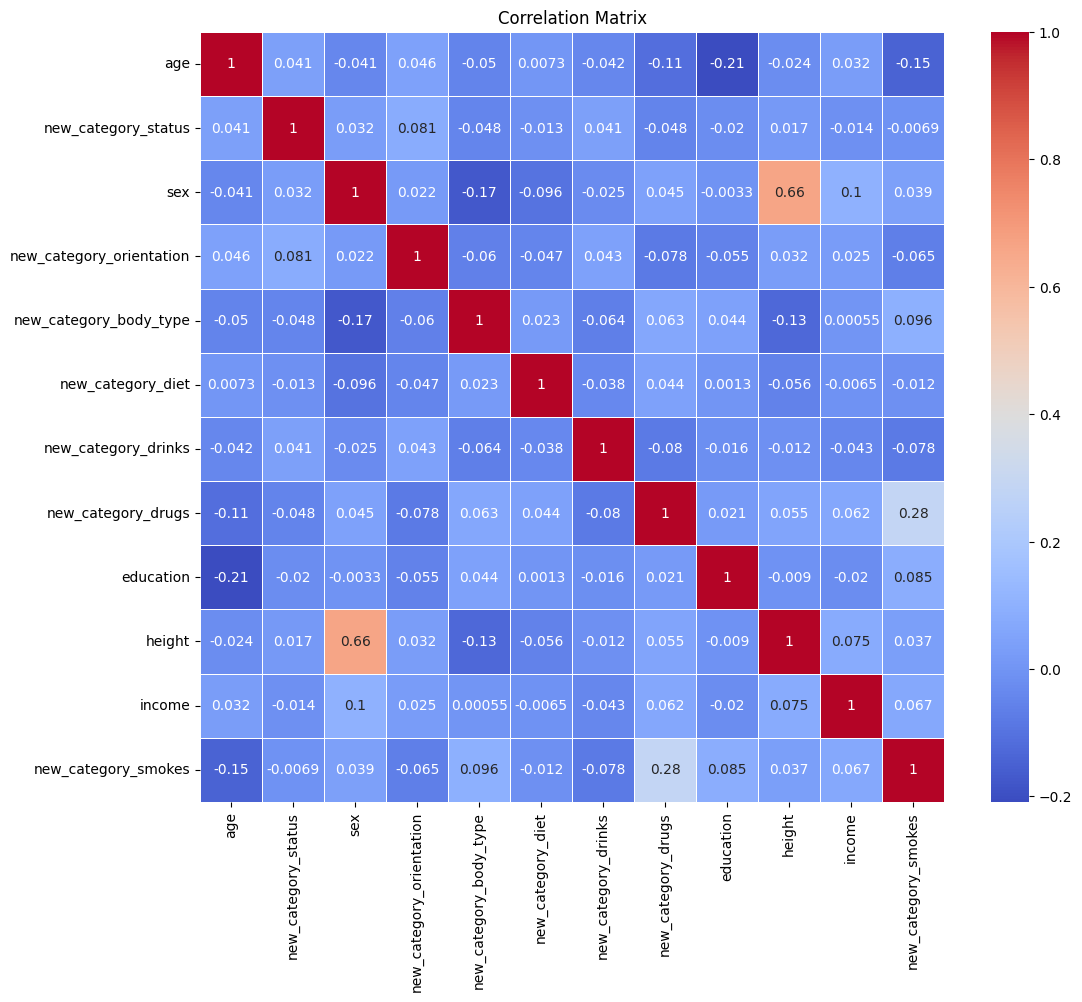

In [13]:
columns_of_interest = ['age', 'new_category_status', 'sex', 'new_category_orientation', 'new_category_body_type', 'new_category_diet', 'new_category_drinks', 'new_category_drugs', 'education',
                       'height', 'income', 'new_category_smokes']

# Subset the DataFrame to the columns of interest
subset_data = cupid_df[columns_of_interest]

# Encode categorical columns
encoder = LabelEncoder()
categorical_columns = ['age', 'new_category_status', 'sex', 'new_category_orientation', 'new_category_body_type', 'new_category_diet', 'new_category_drinks', 'new_category_drugs', 'education',
                       'height', 'income', 'new_category_smokes']
subset_data[categorical_columns] = subset_data[categorical_columns].apply(lambda x: encoder.fit_transform(x.astype(str)))

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Encode categorical variables using one-hot encoding : to create binary columns for each unique value in the categorical columns
columns_to_encode = [
    'sex', 'new_category_diet', 
    'new_category_drinks', 
    'new_category_drugs', 
    'new_category_smokes'
    ,"new_category_status",
    "new_category_orientation"
]

cupid_encoded= pd.get_dummies(cupid_new_df, columns=columns_to_encode, prefix=columns_to_encode)

In [15]:
cupid_encoded.columns

Index(['height', 'age', 'new_category_body_type', 'sex_f', 'sex_m',
       'new_category_diet_anything', 'new_category_diet_vegan_vegetarian',
       'new_category_drinks_others', 'new_category_drinks_socially',
       'new_category_drugs_No', 'new_category_drugs_Yes',
       'new_category_smokes_No', 'new_category_smokes_Yes',
       'new_category_status_No', 'new_category_status_Yes',
       'new_category_orientation_LGBTQ', 'new_category_orientation_Straight'],
      dtype='object')

In [16]:
# label encoding for the target variable
le = LabelEncoder()
cupid_encoded['new_category_body_type_encoded'] = le.fit_transform(cupid_encoded['new_category_body_type'])

In [17]:
# Split the data into features (X) and target variable (y)
X = cupid_encoded.drop(['new_category_body_type', 'new_category_body_type_encoded' ], axis=1)
y = cupid_encoded['new_category_body_type_encoded']
X

,height,age,sex_f,sex_m,new_category_diet_anything,new_category_diet_vegan_vegetarian,new_category_drinks_others,new_category_drinks_socially,new_category_drugs_No,new_category_drugs_Yes,new_category_smokes_No,new_category_smokes_Yes,new_category_status_No,new_category_status_Yes,new_category_orientation_LGBTQ,new_category_orientation_Straight
0,68.0,49,False,True,True,False,False,True,True,False,True,False,False,True,False,True
1,68.0,25,False,True,True,False,False,True,True,False,True,False,False,True,False,True
2,36.0,28,False,True,True,False,False,True,False,True,False,True,False,True,False,True
3,36.0,41,False,True,True,False,False,True,True,False,True,False,False,True,False,True
4,36.0,21,True,False,True,False,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,75.0,30,False,True,True,False,True,False,True,False,True,False,False,True,False,True
59942,75.0,28,False,True,True,False,True,False,True,False,True,False,False,True,False,True
59943,75.0,30,False,True,True,False,False,True,True,False,True,False,False,True,False,True
59944,79.0,38,False,True,True,False,False,True,True,False,True,False,False,True,False,True


In [18]:
X.columns

Index(['height', 'age', 'sex_f', 'sex_m', 'new_category_diet_anything',
       'new_category_diet_vegan_vegetarian', 'new_category_drinks_others',
       'new_category_drinks_socially', 'new_category_drugs_No',
       'new_category_drugs_Yes', 'new_category_smokes_No',
       'new_category_smokes_Yes', 'new_category_status_No',
       'new_category_status_Yes', 'new_category_orientation_LGBTQ',
       'new_category_orientation_Straight'],
      dtype='object')

In [19]:
y

0        0
1        0
2        1
3        1
4        0
        ..
59941    1
59942    2
59943    0
59944    0
59945    1
Name: new_category_body_type_encoded, Length: 59946, dtype: int32

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import accuracy_score

# Create and fit the logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the train and test sets
lr_predictions_test = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_predictions_test)
print("Accuracy:", accuracy)


Accuracy: 0.5379482902418682


In [22]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

tree_predictions_train = tree_model.predict(X_train)
tree_predictions_test = tree_model.predict(X_test)

# # Cross-validation
# lr_cv_scores = cross_val_score(lr_model, X_imputed, y, cv=5)
# print("Logistic Regression - Cross-Validation Scores:", lr_cv_scores)

# knn_cv_scores = cross_val_score(knn_model, X_imputed, y, cv=5)
# print("K-Nearest Neighbors - Cross-Validation Scores:", knn_cv_scores)

# tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10)
# print("Decision Tree - Cross-Validation Scores:", tree_cv_scores)

# Make predictions on the train and test sets
lr_predictions_test = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_predictions_test)
print("Accuracy:", accuracy)


Accuracy: 0.4969974979149291


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# tree_cv_scores = cross_val_score(model, X_train, y_train, cv=10)
# print("Decision Tree - Cross-Validation Scores:", tree_cv_scores)

Accuracy: 0.4950792326939116


In [24]:
from sklearn.svm import SVC

# Create and train the SVM model with RBF kernel
model = SVC(kernel="rbf", random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.534278565471226


In [25]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4742285237698082
